In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_raw = pd.read_csv("/content/drive/My Drive/train.csv")
test_raw  = pd.read_csv("/content/drive/My Drive/test.csv")
data = train_raw.copy()
data_test = test_raw.copy()
test_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
#テストデータ
test_x = test＿raw.copy()

In [ ]:
#PassengerIDの前半4桁を切り取り、Groupとしてカラムを追加する
train_raw["Group"]=train_raw["PassengerId"].str.split("_",expand=True)[0]
train_raw["Group"]=train_raw["Group"].astype(int)

In [ ]:
#全ての支出を合計
train_raw['TotalExpenditure'] = (train_raw['RoomService']+ train_raw['FoodCourt']+ train_raw['ShoppingMall']+ train_raw['Spa']+ train_raw['VRDeck'])

In [ ]:
#テストデータ加工
#PassengerIDの前半4桁を切り取り、Groupとしてカラムを追加する
test_x["Group"]=test_x["PassengerId"].str.split("_",expand=True)[0]
test_x["Group"]=test_x["Group"].astype(int)
#全ての支出を合計
test_x['TotalExpenditure'] = (test_x['RoomService']+ test_x['FoodCourt']+ test_x['ShoppingMall']+ test_x['Spa']+ test_x['VRDeck'])

(array([3.247e+03, 0.000e+00, 0.000e+00, 6.000e+00, 1.900e+01, 9.200e+01,
        4.480e+02, 7.200e+02, 5.000e+02, 1.960e+02, 1.550e+02, 1.250e+02,
        1.630e+02, 1.200e+02, 8.500e+01, 1.050e+02, 7.000e+01, 1.240e+02,
        4.900e+01, 5.900e+01, 7.600e+01, 4.500e+01, 4.600e+01, 7.800e+01,
        3.200e+01, 8.200e+01, 4.500e+01, 3.100e+01, 3.300e+01, 2.600e+01,
        3.700e+01, 2.500e+01, 2.700e+01, 2.900e+01, 2.800e+01, 2.300e+01,
        2.700e+01, 2.500e+01, 2.000e+01, 2.300e+01, 2.000e+01, 1.900e+01,
        1.400e+01, 1.300e+01, 2.700e+01, 1.800e+01, 1.200e+01, 1.800e+01,
        1.600e+01, 1.800e+01, 8.000e+00, 1.200e+01, 1.600e+01, 1.600e+01,
        1.100e+01, 1.100e+01, 8.000e+00, 1.900e+01, 1.500e+01, 1.300e+01,
        1.000e+01, 1.100e+01, 1.000e+01, 1.400e+01, 1.000e+01, 7.000e+00,
        1.500e+01, 5.000e+00, 6.000e+00, 1.000e+01, 5.000e+00, 1.200e+01,
        1.100e+01, 1.100e+01, 7.000e+00, 1.200e+01, 1.000e+01, 1.100e+01,
        8.000e+00, 4.000e+00, 2.000e+0

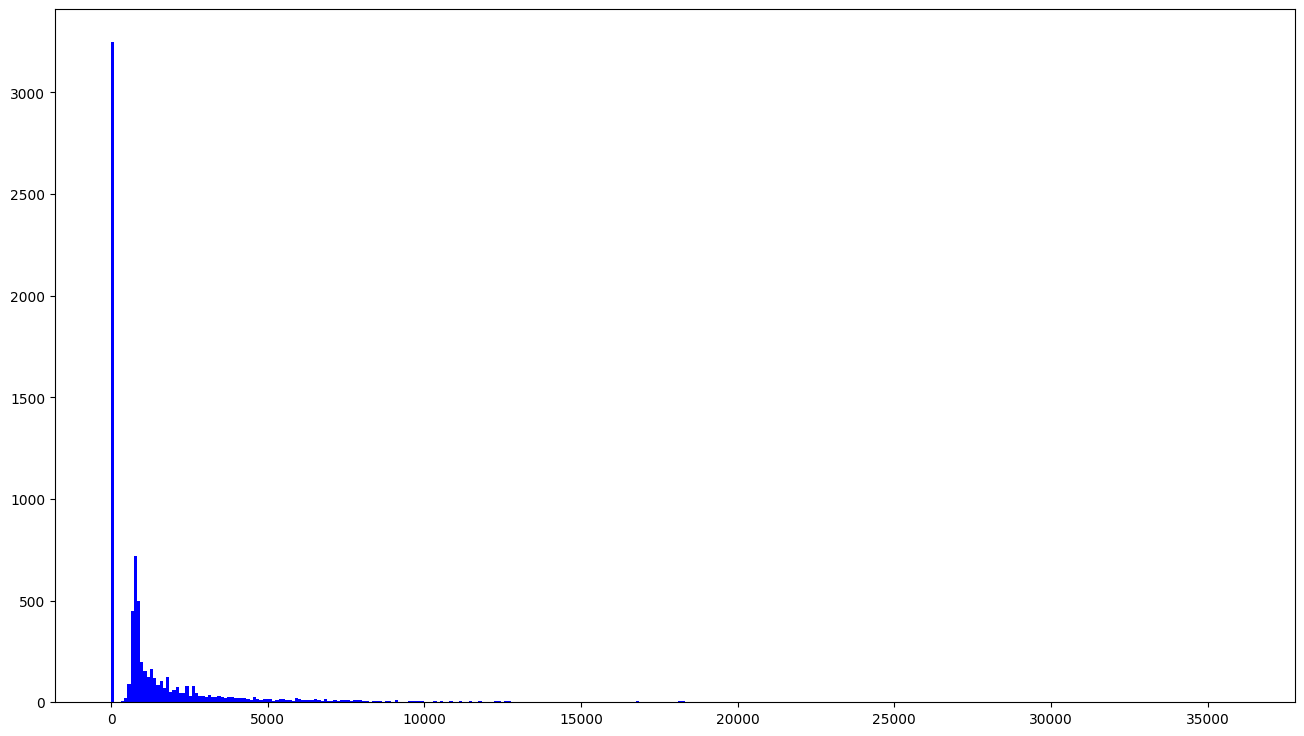

In [ ]:
#TotalExpenditureのデータ可視化
#関係ないから気にしないで
#仮説１検証用
hypothesis = train_raw.copy()
plt.figure(figsize=(16,9))
plt.hist(hypothesis["TotalExpenditure"],bins=350,color="blue")

In [ ]:
#仮説１検証用
hypothesis["TotalExpenditure"].median()

736.0

In [ ]:
#仮説１検証用
hypothesis.loc[hypothesis["TotalExpenditure"] <= 736.0, "TotalExpenditure"] = 1
hypothesis.loc[hypothesis["TotalExpenditure"] > 736.0, "TotalExpenditure"] = 2
hypothesis["TotalExpenditure"].value_counts()

1.0    3893
2.0    3892
Name: TotalExpenditure, dtype: int64

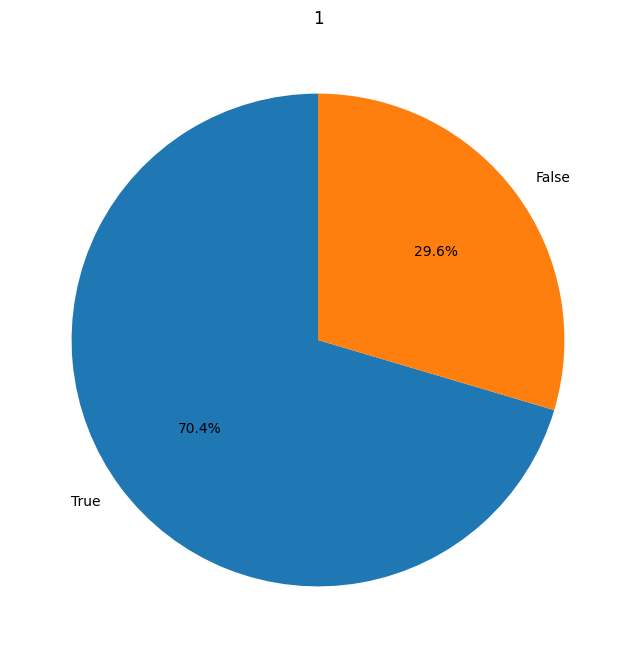

In [ ]:
#仮説１検証用
a = hypothesis[hypothesis['TotalExpenditure'] == 1]
count_a = a["Transported"].value_counts()
plt.figure(figsize=(8_1,8))
plt.pie(count_a, labels=count_a.index, autopct='%1.1f%%', startangle=90)
plt.title("1")
plt.show()

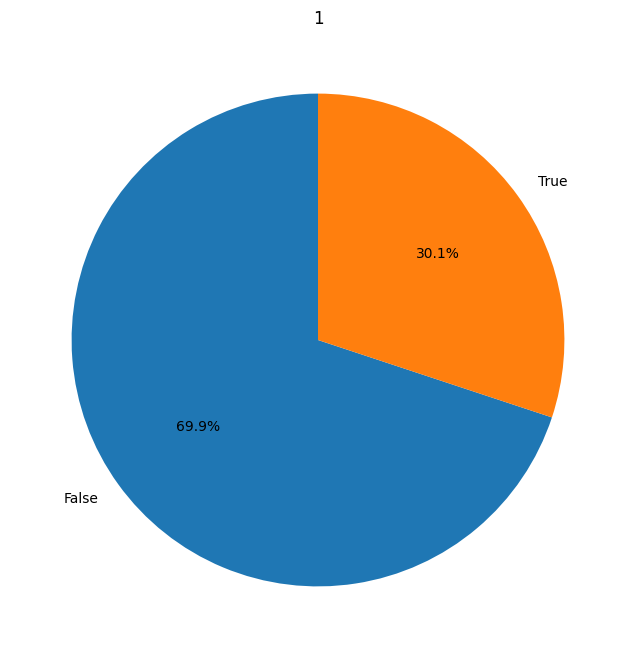

In [ ]:
#仮説１検証用
b = hypothesis[hypothesis['TotalExpenditure'] == 2]
count_b = b["Transported"].value_counts()
plt.figure(figsize=(8_1,8))
plt.pie(count_b, labels=count_b.index, autopct='%1.1f%%', startangle=90)
plt.title("1")
plt.show()

In [ ]:
#カテゴリ変数は最頻値、数値変数は中央値で変換する
train_raw["HomePlanet"].fillna(train_raw["HomePlanet"].mode()[0], inplace=True)
train_raw["CryoSleep"].fillna(train_raw["CryoSleep"].mode()[0], inplace=True)
train_raw["Cabin"].fillna(train_raw["Cabin"].mode()[0], inplace=True)
train_raw["Destination"].fillna(train_raw["Destination"].mode()[0], inplace=True)
train_raw["Age"].fillna(train_raw["Age"].median(), inplace=True)
train_raw["VIP"].fillna(train_raw["VIP"].mode()[0], inplace=True)
train_raw["HomePlanet"].fillna(train_raw["HomePlanet"].mode()[0], inplace=True)
train_raw["TotalExpenditure"].fillna(train_raw["TotalExpenditure"].median(), inplace=True)
train_raw["Group"].fillna(train_raw["Group"].median(), inplace=True)

In [ ]:
#テストデータ
#カテゴリ変数は最頻値、数値変数は中央値で変換する
test_x["HomePlanet"].fillna(test_x["HomePlanet"].mode()[0], inplace=True)
test_x["CryoSleep"].fillna(test_x["CryoSleep"].mode()[0], inplace=True)
test_x["Cabin"].fillna(test_x["Cabin"].mode()[0], inplace=True)
test_x["Destination"].fillna(test_x["Destination"].mode()[0], inplace=True)
test_x["Age"].fillna(test_x["Age"].median(), inplace=True)
test_x["VIP"].fillna(test_x["VIP"].mode()[0], inplace=True)
test_x["HomePlanet"].fillna(test_x["HomePlanet"].mode()[0], inplace=True)
test_x["TotalExpenditure"].fillna(test_x["TotalExpenditure"].median(), inplace=True)
test_x["Group"].fillna(test_x["Group"].median(), inplace=True)

In [ ]:
#Cabinのスラッシュで区分けされた３つのデータを分割
train_raw["Cabin1"]=train_raw["Cabin"].str.split("/",expand=True)[0]
train_raw["Cabin2"]=train_raw["Cabin"].str.split("/",expand=True)[1]
train_raw["Cabin3"]=train_raw["Cabin"].str.split("/",expand=True)[2]

In [ ]:
#テストデータ
#Cabinのスラッシュで区分けされた３つのデータを分割
test_x["Cabin1"]=test_x["Cabin"].str.split("/",expand=True)[0]
test_x["Cabin2"]=test_x["Cabin"].str.split("/",expand=True)[1]
test_x["Cabin3"]=test_x["Cabin"].str.split("/",expand=True)[2]

(array([ 80.,  62.,  80.,  79.,  89.,  55.,  50.,  72.,  66.,  78.,  80.,
         68.,  75.,  64.,  73.,  86.,  60.,  90.,  61.,  67.,  58.,  75.,
         75.,  60.,  65.,  53.,  77.,  63.,  53.,  60.,  50.,  54.,  67.,
         57.,  82.,  59.,  63.,  51.,  63.,  53.,  57.,  77.,  58.,  67.,
         44.,  56.,  64.,  56.,  67.,  64.,  42.,  69.,  46.,  65.,  37.,
         47.,  43.,  33.,  47.,  35.,  46.,  30.,  37.,  30.,  24.,  29.,
         18.,  19.,  25.,  26.,  27.,  23.,  27.,  18.,  16.,  25.,  24.,
         29.,  30.,  25.,  29.,  21.,  31.,  27.,  21.,  28.,  31.,  29.,
         21.,  24.,  21.,  13.,  27.,  28.,  25.,  19.,  27.,  29.,  29.,
         31.,  25.,  23.,  26.,  22.,  27.,  23.,  33.,  19.,  24.,  28.,
         17.,  29.,  16.,  12.,  20.,  12.,  19.,  17.,  14.,  21.,  10.,
         33.,  17.,  16.,  14.,  10.,  15.,  18.,  22.,  14.,  14.,  20.,
         16.,  16.,  16., 226.,  20.,  18.,  15.,  21.,  20.,  22.,  10.,
         17.,  16.,  18.,  14.,  15., 

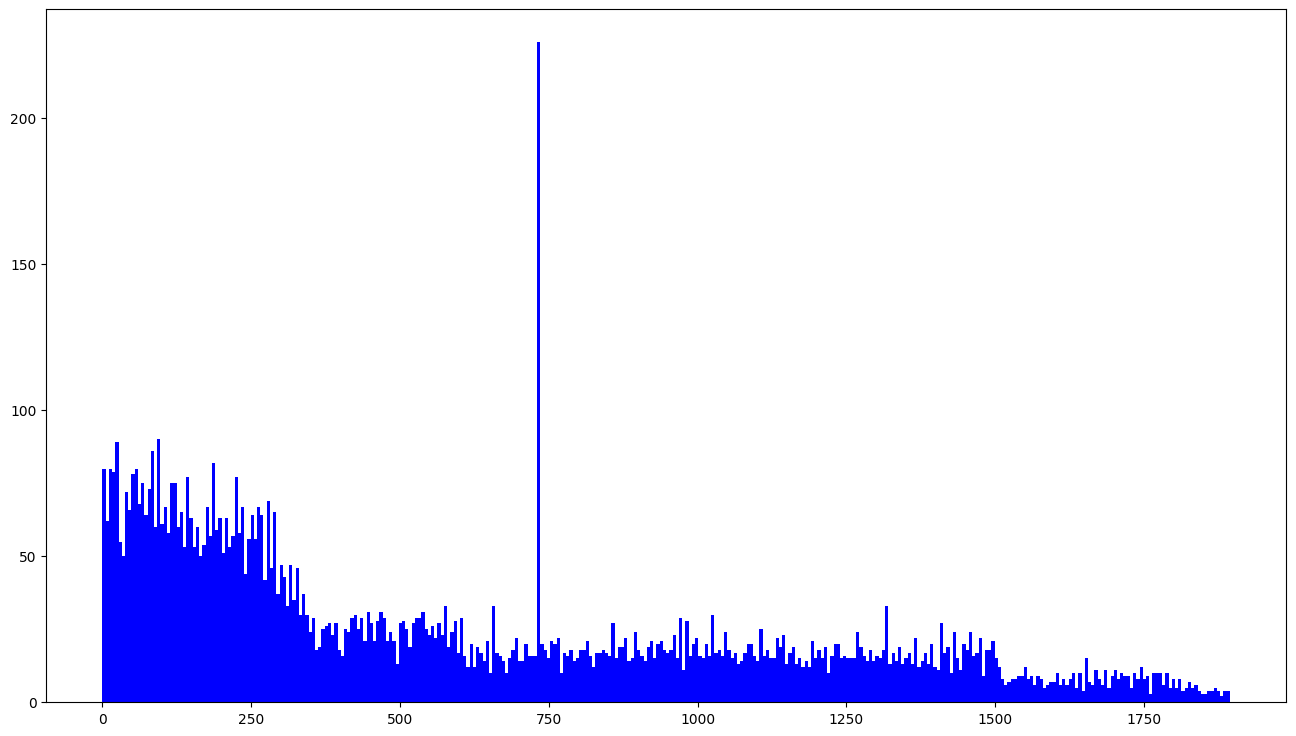

In [ ]:
#Cabin2のデータ可視化
train_raw["Cabin2"]=train_raw["Cabin2"].astype(int)
plt.figure(figsize=(16,9))
plt.hist(train_raw["Cabin2"],bins=350,color="blue")

In [ ]:
#Cabin2のカラムの中で300以下を持つ値のデータを"1"として表示する
train_raw.loc[(0<=train_raw["Cabin2"])&(train_raw["Cabin2"]<300),"Cabin2"]= 1
#Cabin2のカラムの中で1500以下を持つ値のデータを"1"として表示する
train_raw.loc[(300<=train_raw["Cabin2"])&(train_raw["Cabin2"]<1500),"Cabin2"]= 2
#Cabin2のカラムの中で2000以下を持つ値のデータを"1"として表示する
train_raw.loc[(1500<=train_raw["Cabin2"])&(train_raw["Cabin2"]<2000),"Cabin2"]= 3
train_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,TotalExpenditure,Cabin1,Cabin2,Cabin3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,B,1,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,736.0,F,1,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,10383.0,A,1,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,5176.0,A,1,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1091.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,8536.0,A,1,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,0.0,G,2,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1873.0,G,3,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,4637.0,E,2,S


In [ ]:
#テストデータ
test_x["Cabin2"]=test_x["Cabin2"].astype(int)
#Cabin2のカラムの中で300以下を持つ値のデータを"1"として表示する
test_x.loc[(0<=test_x["Cabin2"])&(test_x["Cabin2"]<300),"Cabin2"]= 1
#Cabin2のカラムの中で1500以下を持つ値のデータを"1"として表示する
test_x.loc[(300<=test_x["Cabin2"])&(test_x["Cabin2"]<1500),"Cabin2"]= 2
#Cabin2のカラムの中で2000以下を持つ値のデータを"1"として表示する
test_x.loc[(1500<=test_x["Cabin2"])&(test_x["Cabin2"]<2000),"Cabin2"]= 3
test_x

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,TotalExpenditure,Cabin1,Cabin2,Cabin3
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,0.0,G,1,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,2832.0,F,1,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,0.0,C,1,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,7418.0,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,645.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,0.0,G,2,S
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,1018.0,G,1,P
4274,9271_01,Mars,True,D/296/P,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,0.0,D,1,P
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,26.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,3203.0,D,1,P


In [ ]:
#HomePlanetとDestinationとCryoSleepをOne-hot encording
df_dummies1 = pd.get_dummies(train_raw['HomePlanet'])
train_raw = pd.concat([train_raw,df_dummies1],axis=1)
df_dummies2 = pd.get_dummies(train_raw['Destination'])
train_raw = pd.concat([train_raw,df_dummies2],axis=1)
df_dummies3 = pd.get_dummies(train_raw['CryoSleep'])
train_raw = pd.concat([train_raw,df_dummies3],axis=1)
df_dummies4 = pd.get_dummies(train_raw['VIP'])
train_raw = pd.concat([train_raw,df_dummies4],axis=1)
df_dummies5 = pd.get_dummies(train_raw['Cabin1'])
train_raw = pd.concat([train_raw,df_dummies5],axis=1)
df_dummies6 = pd.get_dummies(train_raw['Cabin2'])
train_raw = pd.concat([train_raw,df_dummies6],axis=1)
df_dummies7 = pd.get_dummies(train_raw['Cabin3'])
train_raw = pd.concat([train_raw,df_dummies7],axis=1)
#カラムの削除
drop_columns = ['PassengerId', 'Cabin', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Cabin1', 'Cabin2', 'Cabin3']
train_raw = train_raw.drop(drop_columns, axis = 1)
train_raw

,Age,Transported,Group,TotalExpenditure,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,...,D,E,F,G,T,1,2,3,P,S
0,39.0,False,1,0.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,24.0,True,2,736.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,58.0,False,3,10383.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,33.0,False,3,5176.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,16.0,True,4,1091.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,False,9276,8536.0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8689,18.0,False,9278,0.0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
8690,26.0,True,9279,1873.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
8691,32.0,False,9280,4637.0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
#テストデータ
#HomePlanetとDestinationとCryoSleepをOne-hot encording
df_dummies8 = pd.get_dummies(test_x['HomePlanet'])
test_x = pd.concat([test_x,df_dummies8],axis=1)
df_dummies9 = pd.get_dummies(test_x['Destination'])
test_x = pd.concat([test_x,df_dummies9],axis=1)
df_dummies10 = pd.get_dummies(test_x['CryoSleep'])
test_x = pd.concat([test_x,df_dummies10],axis=1)
df_dummies11 = pd.get_dummies(test_x['VIP'])
test_x = pd.concat([test_x,df_dummies11],axis=1)
df_dummies12 = pd.get_dummies(test_x['Cabin1'])
test_x = pd.concat([test_x,df_dummies12],axis=1)
df_dummies13 = pd.get_dummies(test_x['Cabin2'])
test_x = pd.concat([test_x,df_dummies13],axis=1)
df_dummies14 = pd.get_dummies(test_x['Cabin3'])
test_x = pd.concat([test_x,df_dummies14],axis=1)
#カラムの削除
drop_columns = ['PassengerId', 'Cabin', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Cabin1', 'Cabin2', 'Cabin3']
test_x = test_x.drop(drop_columns, axis = 1)
test_x

,Age,Group,TotalExpenditure,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,...,D,E,F,G,T,1,2,3,P,S
0,27.0,13,0.0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,19.0,18,2832.0,1,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
2,31.0,19,0.0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,38.0,21,7418.0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
4,20.0,23,645.0,1,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,9266,0.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4273,42.0,9269,1018.0,1,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
4274,26.0,9271,0.0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4275,26.0,9273,3203.0,0,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
#xは説明変数
#yは目的変数
#incliding_totalexpenditureはTotalEpenditureを含む説明変数
x = train_raw.drop(train_raw.columns[1], axis=1)
incliding_totalexpenditure = x.copy()
x = x.drop("TotalExpenditure", axis=1)
y = train_raw["Transported"]
x

,Age,Group,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,False,True,...,D,E,F,G,T,1,2,3,P,S
0,39.0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
1,24.0,2,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
2,58.0,3,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,33.0,3,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,16.0,4,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,9276,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8689,18.0,9278,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
8690,26.0,9279,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
8691,32.0,9280,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
#テストデータ加工
#xは説明変数
#incliding_totalexpenditureはTotalEpenditureを含む説明変数
x_1 = test_x.copy()
incliding_totalexpenditure_1 = x_1.copy()
x_1 = x_1.drop("TotalExpenditure", axis=1)

In [ ]:
#TotalEpenditureを含み、Destinationの目的変数削除
delete_destination_x = incliding_totalexpenditure.copy()
drop_columns_1 = ["PSO J318.5-22","TRAPPIST-1e"]
delete_destination_x = delete_destination_x.drop(drop_columns_1, axis = 1)
delete_destination_x

,Age,Group,TotalExpenditure,Earth,Europa,Mars,55 Cancri e,False,True,False,...,D,E,F,G,T,1,2,3,P,S
0,39.0,1,0.0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
1,24.0,2,736.0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
2,58.0,3,10383.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,33.0,3,5176.0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,16.0,4,1091.0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,9276,8536.0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8689,18.0,9278,0.0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
8690,26.0,9279,1873.0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
8691,32.0,9280,4637.0,0,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
#テストデータ
#TotalEpenditureを含み、Destinationの目的変数削除
delete_destination_x_1 = incliding_totalexpenditure_1.copy()
drop_columns_1 = ["PSO J318.5-22","TRAPPIST-1e"]
delete_destination_x_1 = delete_destination_x_1.drop(drop_columns_1, axis = 1)
delete_destination_x_1

,Age,Group,TotalExpenditure,Earth,Europa,Mars,55 Cancri e,False,True,False,...,D,E,F,G,T,1,2,3,P,S
0,27.0,13,0.0,1,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,19.0,18,2832.0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
2,31.0,19,0.0,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,1
3,38.0,21,7418.0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,20.0,23,645.0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,9266,0.0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
4273,42.0,9269,1018.0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4274,26.0,9271,0.0,0,0,1,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4275,26.0,9273,3203.0,0,1,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
#TotalEpenditureを含み、Destinationの目的変数削除、そしてHomeplanet、Marsの削除
delete_HomePlanet_x = delete_destination_x.copy()
drop_columns_2 = ["Mars"]
delete_HomePlanet_x = delete_HomePlanet_x.drop(drop_columns_2, axis = 1)
delete_HomePlanet_x

,Age,Group,TotalExpenditure,Earth,Europa,55 Cancri e,False,True,False,True,...,D,E,F,G,T,1,2,3,P,S
0,39.0,1,0.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,24.0,2,736.0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,58.0,3,10383.0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,33.0,3,5176.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,16.0,4,1091.0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,9276,8536.0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
8689,18.0,9278,0.0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
8690,26.0,9279,1873.0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
8691,32.0,9280,4637.0,0,1,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
#テストデータ
#TotalEpenditureを含み、Destinationの目的変数削除、そしてHomeplanet、Marsの削除
delete_HomePlanet_x_1 = delete_destination_x_1.copy()
drop_columns_2 = ["Mars"]
delete_HomePlanet_x_1 = delete_HomePlanet_x_1.drop(drop_columns_2, axis = 1)
delete_HomePlanet_x_1

,Age,Group,TotalExpenditure,Earth,Europa,55 Cancri e,False,True,False,True,...,D,E,F,G,T,1,2,3,P,S
0,27.0,13,0.0,1,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,19.0,18,2832.0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,31.0,19,0.0,0,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,38.0,21,7418.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,20.0,23,645.0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,9266,0.0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
4273,42.0,9269,1018.0,1,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4274,26.0,9271,0.0,0,0,1,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
4275,26.0,9273,3203.0,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
#TotalEpenditureを含み、Destinationの目的変数削除、そしてHomeplanet、Marsの削除、そしてCabinのP or Sを削除
delete_cabin_p_s_x = delete_HomePlanet_x.copy()
drop_columns_3 = ["P","S"]
delete_cabin_p_s_x = delete_cabin_p_s_x.drop(drop_columns_3, axis = 1)
delete_cabin_p_s_x

,Age,Group,TotalExpenditure,Earth,Europa,55 Cancri e,False,True,False,True,...,B,C,D,E,F,G,T,1,2,3
0,39.0,1,0.0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,24.0,2,736.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,58.0,3,10383.0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,33.0,3,5176.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,16.0,4,1091.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,9276,8536.0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8689,18.0,9278,0.0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
8690,26.0,9279,1873.0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8691,32.0,9280,4637.0,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#テストデータ
#TotalEpenditureを含み、Destinationの目的変数削除、そしてHomeplanet、Marsの削除、そしてCabinのP or Sを削除
delete_cabin_p_s_x_1 = delete_HomePlanet_x_1.copy()
drop_columns_3 = ["P","S"]
delete_cabin_p_s_x_1 = delete_cabin_p_s_x_1.drop(drop_columns_3, axis = 1)
delete_cabin_p_s_x_1

,Age,Group,TotalExpenditure,Earth,Europa,55 Cancri e,False,True,False,True,...,B,C,D,E,F,G,T,1,2,3
0,27.0,13,0.0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,19.0,18,2832.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,31.0,19,0.0,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,38.0,21,7418.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,20.0,23,645.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,9266,0.0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4273,42.0,9269,1018.0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4274,26.0,9271,0.0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4275,26.0,9273,3203.0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# スケーリングを行うデータを用意
scaled_data_x = delete_cabin_p_s_x.copy()
# StandardScalerオブジェクトを作成
scaler = StandardScaler()
# Age TotalExpenditureのデータを標準化
df = pd.DataFrame(scaler.fit_transform(scaled_data_x.loc[:, ['Age', 'TotalExpenditure']]), columns=['Age' ,'TotalExpenditure'])
scaled_data_x ['Age'] = df['Age']
scaled_data_x ['TotalExpenditure'] = df['TotalExpenditure']
# 標準化後のデータを確認
scaled_data_x = pd.DataFrame(scaled_data_x)
scaled_data_x

,Age,Group,TotalExpenditure,Earth,Europa,55 Cancri e,False,True,False,True,...,B,C,D,E,F,G,T,1,2,3
0,0.711945,1,-0.520480,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,-0.334037,2,-0.248103,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,2.036857,3,3.322033,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.293552,3,1.395040,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.891895,4,-0.116726,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,9276,2.638500,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8689,-0.752431,9278,-0.520480,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
8690,-0.194573,9279,0.172675,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8691,0.223820,9280,1.195569,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#テストデータ
# スケーリングを行うデータを用意
scaled_data_x_1 = delete_cabin_p_s_x_1.copy()
# StandardScalerオブジェクトを作成
scaler = StandardScaler()
# Age TotalExpenditureのデータを標準化
df = pd.DataFrame(scaler.fit_transform(scaled_data_x_1.loc[:, ['Age', 'TotalExpenditure']]), columns=['Age' ,'TotalExpenditure'])
scaled_data_x_1 ['Age'] = df['Age']
scaled_data_x_1 ['TotalExpenditure'] = df['TotalExpenditure']
# 標準化後のデータを確認
scaled_data_x_1 = pd.DataFrame(scaled_data_x_1)
scaled_data_x_1

,Age,Group,TotalExpenditure,Earth,Europa,55 Cancri e,False,True,False,True,...,B,C,D,E,F,G,T,1,2,3
0,-0.114147,13,-0.508842,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,-0.684313,18,0.546793,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0.170937,19,-0.508842,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.669832,21,2.256236,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,-0.613042,23,-0.268417,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.384749,9266,-0.508842,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4273,0.954916,9269,-0.129380,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4274,-0.185417,9271,-0.508842,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4275,-0.185417,9273,0.685084,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
